In [24]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Image_Processing_with_Keras_in_Python/datasets/'
import pandas as pd
import numpy as np


In [25]:
img_rows, img_cols = 28,28

In [26]:
data = pd.read_csv(path_data + 'clothing_mnist/fashion-mnist_test.csv')

In [27]:
train_data = data.drop(columns='label').iloc[:50, :].values.reshape(50,28,28,1)

train_labels = data['label'][:50]


train_data.shape, train_labels.shape

((50, 28, 28, 1), (50,))

In [28]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

train_labels.shape

(50, 10)

In [29]:
test_data = data.drop(columns=['label']).iloc[50:60, :].values.reshape(10,28,28,1)
test_labels = to_categorical(data['label'][50:60])

test_data.shape, test_labels.shape

((10, 28, 28, 1), (10, 10))

In [30]:
from tensorflow import keras
from keras.models import Sequential

In [52]:
model = Sequential()

from keras.layers import MaxPool2D, Conv2D, Dense, Flatten

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size= 2, activation = 'relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 27, 27, 15)        75        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 15)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 5)         305       
                                                                 
 flatten_6 (Flatten)         (None, 720)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7210      
                                                                 
Total params: 7,590
Trainable params: 7,590
Non-trainable params: 0
___________________________________________________

In [32]:
checkpoint = keras.callbacks.ModelCheckpoint(path_data + 'model.hdf5', monitor='val_loss', save_best_only=True)

In [53]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, epochs = 3, batch_size = 10, validation_split = 0.20)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size = 10)

Epoch 1/3
4/4 [==============================] - 2s 143ms/step - loss: 23.7347 - accuracy: 0.1250 - val_loss: 22.5371 - val_accuracy: 0.3000
Epoch 2/3
4/4 [==============================] - 0s 33ms/step - loss: 15.9302 - accuracy: 0.1250 - val_loss: 18.2535 - val_accuracy: 0.2000
Epoch 3/3
1/1 [==============================] - 0s 49ms/step - loss: 11.4681 - accuracy: 0.1000


[11.468119621276855, 0.10000000149011612]

Epoch 1/3
4/4 [==============================] - 0s 60ms/step - loss: 6.0379 - accuracy: 0.2500 - val_loss: 4.8703 - val_accuracy: 0.1000
Epoch 2/3
4/4 [==============================] - 0s 28ms/step - loss: 4.7617 - accuracy: 0.3500 - val_loss: 4.3690 - val_accuracy: 0.2000
Epoch 3/3
4/4 [==============================] - 0s 31ms/step - loss: 3.6610 - accuracy: 0.3750 - val_loss: 3.9793 - val_accuracy: 0.2000


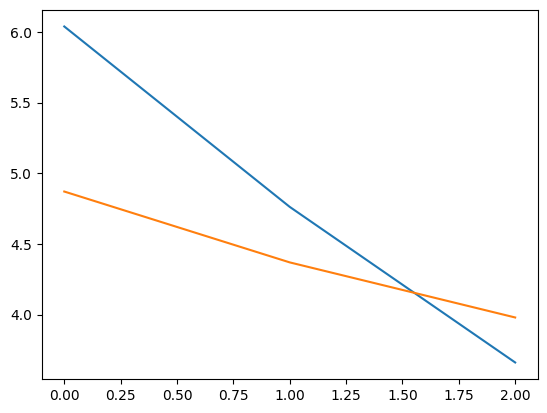

"\nThat's great! If you continue for many epochs, the validation loss will start going back up.\n"

In [34]:
# exercise 01

"""
Plot the learning curves

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.
"""

# Instructions

"""

    Fit the model to the training data (train_data).
    Use a validation split of 20%, 3 epochs and batch size of 10.
    Plot the training loss.
    Plot the validation loss.

"""

# solution

import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split = 0.2, epochs = 3, batch_size = 10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

#----------------------------------#

# Conclusion

"""
That's great! If you continue for many epochs, the validation loss will start going back up.
"""

In [35]:
# exercise 02

"""
Using stored weights to predict in a test set

Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).
"""

# Instructions

"""

    Load the weights from a file called 'weights.hdf5'.
    Predict the classes of the first three images from test_data.

"""

# solution

# Load the weights from file
model.load_weights(path_data + 'model.hdf5')

# Predict from the first three images in the test data
print(model.predict(test_data[:3]))

#----------------------------------#

# Conclusion

"""
Nicely done! How would you use these weights to evaluate the model instead?
"""

1/1 [==============================] - 0s 231ms/step
[[2.4564049e-05 5.5433853e-09 5.5163848e-05 4.0616741e-04 9.9842548e-01
  1.0880457e-03 4.9247994e-08 4.7710972e-07 1.0112031e-07 7.4674693e-09]
 [1.5723097e-05 5.9922663e-16 2.5432321e-11 8.0885370e-09 5.4237938e-01
  2.7178568e-04 4.5733073e-01 1.6234278e-10 2.4114931e-06 2.2621724e-09]
 [6.0093367e-12 6.5434569e-09 6.6076584e-09 1.8110078e-09 1.2424933e-11
  2.3803204e-09 9.2154352e-14 3.4419724e-11 9.9999118e-01 8.7624830e-06]]


'\nNicely done! How would you use these weights to evaluate the model instead?\n'

In [48]:
# exercise 03

"""
Adding dropout to your network

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

    Convolution (15 units, kernel size 2, 'relu' activation)
    Dropout (20%)
    Convolution (5 units, kernel size 2, 'relu' activation)
    Flatten
    Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.
"""

# Instructions

"""

    Add dropout applied to the first layer with 20%.
    Add a flattening layer.

"""
model = Sequential()
# solution
from keras.layers import Dropout
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.20))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#----------------------------------#
print(model.summary())
# Conclusion

"""
Great! Now the kernels will be more different from each other.
"""

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 dropout_2 (Dropout)         (None, 27, 27, 15)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 5)         305       
                                                                 
 flatten_4 (Flatten)         (None, 3380)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                33810     
                                                                 
Total params: 34,190
Trainable params: 34,190
Non-trainable params: 0
_________________________________________________________________
None


'\nGreat! Now the kernels will be more different from each other.\n'

In [49]:
# exercise 04

"""
Add batch normalization to your network

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

    Convolution (15 units, kernel size 2, 'relu' activation)
    Batch normalization
    Convolution (5 unites, kernel size 2, 'relu' activation)
    Flatten
    Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.
"""

# Instructions

"""

    Add the first convolutional layer. You can use the img_rows and img_cols objects available in your workspace to define the input_shape of this layer.
    Add batch normalization applied to the outputs of the first layer.

"""

# solution
from keras.layers import BatchNormalization
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(15, kernel_size = 2, activation = 'relu', input_shape = (28, 28, 1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#----------------------------------#

# Conclusion

"""
That's useful! That should improve training.
"""

"\nThat's useful! That should improve training.\n"

In [54]:
# exercise 05

"""
Extracting a kernel from a trained network

One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.
"""

# Instructions

"""

    Load the weights into the model from the file weights.hdf5.
    Get the first convolutional layer in the model from the layers attribute.
    Use the .get_weights() method to extract the weights from this layer.

"""

# solution

# Load the weights into the model
model.load_weights(path_data + 'full_model.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

#----------------------------------#

# Conclusion

"""
That's great! You can extract the weights from other layers too.
"""

[[ 0.24854533 -0.31633815]
 [ 0.0070901   0.06209173]]


"\nThat's great! You can extract the weights from other layers too.\n"

In [55]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

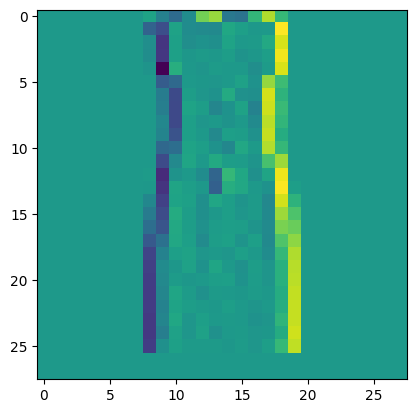

"\nThat's nice. You can keep going and visualize the kernel responses for all the kernels in this layer!\n"

In [56]:
# exercise 06

"""
Visualizing kernel responses

One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. Given images in the test_data variable, a function called extract_kernel() that extracts a kernel from the provided network, and the function called convolution() that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with matplotlib.

A deep CNN model, a function convolution(), along with the kernel you extracted in an earlier exercise is available in your workspace.

Ready to take your deep learning to the next level? Check out Advanced Deep Learning with Keras to see how the Keras functional API lets you build domain knowledge to solve new types of problems.
"""

# Instructions

"""

    Use the convolution() function to convolve the extracted kernel with the first channel of the fourth item in the image array.
    Visualize the resulting convolution with imshow().

"""

# solution

import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()

#----------------------------------#

# Conclusion

"""
That's nice. You can keep going and visualize the kernel responses for all the kernels in this layer!
"""